# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
# '/content/drive/MyDrive/Colab Notebooks/{폴더 이름}' 사용
os.chdir('/content/drive/MyDrive/Colab Notebooks/project')

Mounted at /content/drive


# 라이브러리

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.tree import export_text

from sklearn.inspection import PartialDependenceDisplay


# 데이터 로드

In [ ]:
# 데이터 로드
data = pd.read_csv('data/final_data_senti.csv').drop(columns = 'Unnamed: 0')
data

,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,Duration_sec,...,color2,color3,rgb1,rgb2,rgb3,Featuring,neg,neu,pos,compound
0,2014,1,2,1,The Monster,Eminem Featuring Rihanna,I'm friends with the monster\nThat's under my ...,랩/힙합,110.009,251.246,...,Cyan Muted Medium,Cyan Vibrant Light,"(186, 97, 156)","(39, 83, 108)","(138, 208, 228)",1.0,0.125,0.703,0.172,0.9904
1,2014,1,2,2,Timber,Pitbull Featuring Ke$ha,"It's going down, I'm yelling timber\nYou bette...",POP,129.992,204.160,...,Blue Medium Medium,Blue Vibrant Medium,"(18, 22, 36)","(60, 98, 156)","(184, 204, 226)",1.0,0.006,0.850,0.144,0.9958
2,2014,1,2,3,Counting Stars,OneRepublic,"Lately, I've been, I've been losing sleep\nDre...",랩/힙합,122.013,257.840,...,Orange Medium Dark,Orange Medium Very Dark,"(82, 68, 48)","(201, 171, 129)","(161, 153, 132)",0.0,0.144,0.779,0.077,-0.9867
3,2014,1,2,4,Royals,Lorde,I've never seen a diamond in the flesh \nI cut...,"POP, 록/메탈",84.876,190.185,...,Red Muted Very Dark,Red Vibrant Dark,"(151, 123, 112)","(47, 39, 32)","(233, 221, 224)",0.0,0.059,0.809,0.131,0.9887
4,2014,1,2,5,Say Something,A Great Big World & Christina Aguilera,"Say something, I'm giving up on you\nI'll be t...",발라드,141.284,229.400,...,Yellow Vibrant Medium,Cyan Medium Dark,"(33, 39, 67)","(241, 244, 229)","(91, 155, 157)",0.0,0.017,0.780,0.203,0.9771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52095,2023,12,5,96,Winter Wonderland,Chloe,"[Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...","재즈, 보컬재즈, 애시드/퓨전/팝",77.810,1037.907,...,Blue Muted Dark,Red Medium Very Dark,"(200, 215, 236)","(55, 67, 84)","(110, 100, 103)",0.0,0.055,0.862,0.083,0.8405
52096,2023,12,5,97,Run For The Hills,Tate McRae,"Hotels, late nights, hands through my hair\nLo...",POP,129.918,143.940,...,Purple Vibrant Very Dark,Red Medium Dark,"(31, 30, 30)","(191, 187, 195)","(175, 111, 99)",0.0,0.020,0.902,0.077,0.9676
52097,2023,12,5,98,Que Onda,Calle 24 x Chino Pacas x Fuerza Regida,"Baby, me vuelves loco\r\nNo se esperó al hotel...","월드뮤직, 라틴",125.012,189.426,...,Blue Medium Light,Blue Medium Dark,"(161, 163, 191)","(30, 57, 153)","(83, 61, 137)",0.0,0.046,0.938,0.016,-0.7319
52098,2023,12,5,99,Great Gatsby,Rod Wave,"(Pipe that shit up, TnT)\n(Trill got that juic...",POP,156.975,146.752,...,Red Medium Medium,Yellow Medium Very Dark,"(54, 32, 13)","(176, 111, 58)","(132, 132, 124)",0.0,0.191,0.743,0.066,-0.9849


In [ ]:
# 전처리를 위한 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52100 entries, 0 to 52099
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          52100 non-null  int64  
 1   Month         52100 non-null  int64  
 2   Week          52100 non-null  int64  
 3   Rank          52100 non-null  int64  
 4   Title         52100 non-null  object 
 5   Artist        52100 non-null  object 
 6   Lyrics        52100 non-null  object 
 7   Genre         52100 non-null  object 
 8   BPM           52100 non-null  float64
 9   Duration_sec  52100 non-null  float64
 10  color1        52084 non-null  object 
 11  color2        52084 non-null  object 
 12  color3        52084 non-null  object 
 13  rgb1          52084 non-null  object 
 14  rgb2          52084 non-null  object 
 15  rgb3          52084 non-null  object 
 16  Featuring     52100 non-null  float64
 17  neg           52100 non-null  float64
 18  neu           52100 non-nu

# 전처리

* 기준 파일: final_data_senti.csv

## Genre: 장르 분리

In [ ]:
for i in range(len(data)):
  data.iloc[i, 7] = data.iloc[i].Genre.split(',')[0]

## Genre: 힙합 -> 랩/힙합

In [ ]:
data.loc[:, 'Genre'] = data.Genre.apply(lambda x: '랩/힙합' if x == '힙합' else x)

In [ ]:
# '힙합' 데이터가 없는 것을 확인
data[data.Genre == '힙합']

,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,Duration_sec,...,color2,color3,rgb1,rgb2,rgb3,Featuring,neg,neu,pos,compound


## compound: 절댓값 처리로, 감정의 극단적인 정도

In [ ]:
data['compound'] = abs(data['compound'])

In [ ]:
data.compound.describe()

,compound
count,52100.000000
mean,0.913767
std,0.175091
min,0.000000
25%,0.928700
50%,0.986200
75%,0.996000
max,0.999900


## Genre: 상위 10개 장르만 사용, 나머지는 기타로

In [ ]:
data.Genre.value_counts()

,count
Genre,
POP,15713
랩/힙합,13372
컨트리,5045
R&B/Soul,3950
록/메탈,2987
댄스,2852
일렉트로니카,2371
월드뮤직,1309
발라드,940


In [ ]:
top10_genre = ['POP', '랩/힙합', '컨트리', 'R&B/Soul', '록/메탈']
data['Genre'] = data.Genre.apply(lambda x: x if x in top10_genre else '기타')

In [ ]:
data.Genre.value_counts()

,count
Genre,
POP,15713
랩/힙합,13372
기타,11033
컨트리,5045
R&B/Soul,3950
록/메탈,2987


## RGB1: R, G, B로

In [ ]:
data['R'] = 0
data['G'] = 0
data['B'] = 0

In [ ]:
data[['R', 'G', 'B']] = data['rgb1'].dropna().apply(lambda x: pd.Series([int(i) for i in x.strip('()').split(',')]))

In [ ]:
data['R'] = data.R.fillna(data.R.mean())
data['G'] = data.G.fillna(data.G.mean())
data['B'] = data.B.fillna(data.B.mean())

In [ ]:
data[['R', 'G', 'B']] = data[['R', 'G', 'B']].astype(int)

## top10 여부 컬럼 추가

In [ ]:
data['isTop20'] = data.Rank.apply(lambda x: 1 if x <= 20 else 0 )
data

,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,Duration_sec,...,rgb3,Featuring,neg,neu,pos,compound,R,G,B,isTop20
0,2014,1,2,1,The Monster,Eminem Featuring Rihanna,I'm friends with the monster\nThat's under my ...,랩/힙합,110.009,251.246,...,"(138, 208, 228)",1.0,0.125,0.703,0.172,0.9904,186,97,156,1
1,2014,1,2,2,Timber,Pitbull Featuring Ke$ha,"It's going down, I'm yelling timber\nYou bette...",POP,129.992,204.160,...,"(184, 204, 226)",1.0,0.006,0.850,0.144,0.9958,18,22,36,1
2,2014,1,2,3,Counting Stars,OneRepublic,"Lately, I've been, I've been losing sleep\nDre...",랩/힙합,122.013,257.840,...,"(161, 153, 132)",0.0,0.144,0.779,0.077,0.9867,82,68,48,1
3,2014,1,2,4,Royals,Lorde,I've never seen a diamond in the flesh \nI cut...,POP,84.876,190.185,...,"(233, 221, 224)",0.0,0.059,0.809,0.131,0.9887,151,123,112,1
4,2014,1,2,5,Say Something,A Great Big World & Christina Aguilera,"Say something, I'm giving up on you\nI'll be t...",기타,141.284,229.400,...,"(91, 155, 157)",0.0,0.017,0.780,0.203,0.9771,33,39,67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52095,2023,12,5,96,Winter Wonderland,Chloe,"[Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...",기타,77.810,1037.907,...,"(110, 100, 103)",0.0,0.055,0.862,0.083,0.8405,200,215,236,0
52096,2023,12,5,97,Run For The Hills,Tate McRae,"Hotels, late nights, hands through my hair\nLo...",POP,129.918,143.940,...,"(175, 111, 99)",0.0,0.020,0.902,0.077,0.9676,31,30,30,0
52097,2023,12,5,98,Que Onda,Calle 24 x Chino Pacas x Fuerza Regida,"Baby, me vuelves loco\r\nNo se esperó al hotel...",기타,125.012,189.426,...,"(83, 61, 137)",0.0,0.046,0.938,0.016,0.7319,161,163,191,0
52098,2023,12,5,99,Great Gatsby,Rod Wave,"(Pipe that shit up, TnT)\n(Trill got that juic...",POP,156.975,146.752,...,"(132, 132, 124)",0.0,0.191,0.743,0.066,0.9849,54,32,13,0


## 사용 feature 정의

* 제외 feature
  * Rank: isTop10로 대체
  * Title
  * Artist
  * Lyrics
  * color1, color2, color3: 'R', 'G', 'B'로 대체
  * neg, neu, pos: compound로 대체

In [ ]:
using_features = ['Year', 'Month', 'Week', 'Genre', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'Featuring', 'compound', 'isTop20']
data = data[using_features]

In [ ]:
data[data.R.isna()]

,Year,Month,Week,Genre,BPM,Duration_sec,R,G,B,Featuring,compound,isTop20


## 데이터 타입 변경

* encoding: label encoding <br>
장르의 카테고리 수가 많기 때문에 컬럼 수를 늘리지 않는 label encoding이 적합

In [ ]:
# 수치형(number) 변수와 범주형(category) 변수로 구분
num_features = ['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'compound']
cat_features = ['Genre', 'Featuring', 'isTop20']

data[cat_features] = data[cat_features].astype('category')

<ipython-input-121-0bc9cb24d79f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat_features] = data[cat_features].astype('category')


# 모델링

## 데이터 준비: 스케일링 X

In [ ]:
X = data.drop(columns = 'isTop20')
y = data['isTop20']

encoder = LabelEncoder()
X_cat_encoded = encoder.fit_transform(X[['Genre']]).reshape(-1, 1)
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"feature: Genre, mapping value: {le_name_mapping}")

X_scaled = np.hstack((X[num_features], X_cat_encoded))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle = True, test_size = 0.3, random_state = 42)

feature: Genre, mapping value: {'CCM': 0, 'J-POP': 1, 'POP': 2, 'R&B': 3, 'R&B/Soul': 4, 'R&B/Soul 국외영화': 5, '게임': 6, '국내드라마': 7, '국내뮤지컬': 8, '국내영화': 9, '국악': 10, '국외드라마': 11, '국외뮤지컬': 12, '국외영화': 13, '뉴에이지': 14, '댄스': 15, '랩/힙합': 16, '록/메탈': 17, '뮤직테라피': 18, '발라드': 19, '블루스': 20, '성인가요/트로트': 21, '애니메이션/웹툰': 22, '월드뮤직': 23, '인디음악': 24, '일렉트로니카': 25, '재즈': 26, '컨트리': 27, '클래식': 28, '키즈': 29, '포크': 30, '포크/블루스': 31}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 데이터 준비: 스케일링 O

In [ ]:
X = data.drop(columns = ['isTop20'])
y = data['isTop20']

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])

# encoder = LabelEncoder()
X_genre_encoded = pd.get_dummies(X['Genre'])
# le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
# print(f"feature: Genre, mapping value: {le_name_mapping}")

encoder = LabelEncoder()
X_featuring_encoded = encoder.fit_transform(X['Featuring']).reshape(-1, 1)
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"feature: Featuring, mapping value: {le_name_mapping}")

X_scaled = np.hstack((X_num_scaled, X_genre_encoded, X_featuring_encoded, X['compound'].values.reshape(-1, 1)))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle = True, test_size = 0.2, random_state = 42)

feature: Featuring, mapping value: {0.0: 0, 1.0: 1}


In [ ]:
# 원본
X = data.drop(columns = ['isTop20'])
y = data['isTop20']

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])

encoder = LabelEncoder()
X_genre_encoded = encoder.fit_transform(X['Genre']).reshape(-1, 1)
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"feature: Genre, mapping value: {le_name_mapping}")

encoder = LabelEncoder()
X_featuring_encoded = encoder.fit_transform(X['Featuring']).reshape(-1, 1)
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"feature: Featuring, mapping value: {le_name_mapping}")

X_scaled = np.hstack((X_num_scaled, X_genre_encoded, X_featuring_encoded, X['compound'].values.reshape(-1, 1)))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle = True, test_size = 0.2, random_state = 42)


feature: Genre, mapping value: {'POP': 0, 'R&B/Soul': 1, '기타': 2, '랩/힙합': 3, '록/메탈': 4, '컨트리': 5}
feature: Featuring, mapping value: {0.0: 0, 1.0: 1}


In [ ]:
# train/test split -> encoding, labeling
X = data.drop(columns = ['isTop20'])
y = data['isTop20']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])
X_test_num_scaled = scaler.transform(X_test[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])

X_train_genre_encoded = encoder.fit_transform(X_train['Genre']).reshape(-1, 1)
# X_train_genre_encoded = pd.get_dummies(X_train[['Genre']])
X_test_genre_encoded = encoder.transform(X_test['Genre']).reshape(-1, 1)
# X_test_genre_encoded = pd.get_dummies(X_test[['Genre']])
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"feature: Genre, mapping value: {le_name_mapping}")

encoder = LabelEncoder()
X_train_featuring_encoded = encoder.fit_transform(X_train['Featuring']).reshape(-1, 1)
X_test_featuring_encoded = encoder.transform(X_test['Featuring']).reshape(-1, 1)
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"feature: Featuring, mapping value: {le_name_mapping}")

X_train_scaled = np.hstack((X_train_num_scaled, X_train_genre_encoded, X_train_featuring_encoded, X_train['compound'].values.reshape(-1, 1)))
X_test_scaled = np.hstack((X_test_num_scaled, X_test_genre_encoded, X_test_featuring_encoded, X_test['compound'].values.reshape(-1, 1)))

feature: Genre, mapping value: {'POP': 0, 'R&B/Soul': 1, '기타': 2, '랩/힙합': 3, '록/메탈': 4, '컨트리': 5}
feature: Featuring, mapping value: {0.0: 0, 1.0: 1}


In [ ]:
X_test_genre_encoded.columns

Index(['Genre_POP', 'Genre_R&B/Soul', 'Genre_기타', 'Genre_랩/힙합', 'Genre_록/메탈',
       'Genre_컨트리'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = data.drop(columns = ['isTop20'])
y = data['isTop20']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])
X_test_num_scaled = scaler.transform(X_test[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])

encoder = OneHotEncoder(sparse_output=False)

X_train_genre_encoded = encoder.fit_transform(X_train[['Genre']])
X_test_genre_encoded = encoder.transform(X_test[['Genre']])

featuring_encoder = LabelEncoder()
X_train_featuring_encoded = featuring_encoder.fit_transform(X_train['Featuring']).reshape(-1, 1)
X_test_featuring_encoded = featuring_encoder.transform(X_test['Featuring']).reshape(-1, 1)

X_train_scaled = np.hstack((X_train_num_scaled, X_train_genre_encoded, X_train_featuring_encoded, X_train['compound'].values.reshape(-1, 1)))
X_test_scaled = np.hstack((X_test_num_scaled, X_test_genre_encoded, X_test_featuring_encoded, X_test['compound'].values.reshape(-1, 1)))

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("X_train_scaled sample:", X_train_scaled[:5])
print("X_test_scaled sample:", X_test_scaled[:5])

X_train_scaled shape: (41680, 16)
X_test_scaled shape: (10420, 16)
X_train_scaled sample: [[-0.526029    1.58629592  1.80833444 -0.64795702 -0.78833086  1.30423732
   1.56174096  1.53434336  0.          1.          0.          0.
   0.          0.          1.          0.9983    ]
 [-0.526029    1.29583343  1.02030182  0.39860124  0.24263411  0.62991654
   1.32546216  1.4081658   0.          0.          1.          0.
   0.          0.          0.          0.9965    ]
 [ 0.52012223  1.58629592 -1.34379602 -0.07368064 -0.12299654  0.85893114
   1.18647463  1.38012634  0.          1.          0.          0.
   0.          0.          1.          0.976     ]
 [-1.57218023 -1.60879143 -0.5557634   0.90029941  0.54065048  1.18973002
   1.57563971  1.6465012   0.          0.          0.          1.
   0.          0.          0.          0.991     ]
 [ 1.21755639 -1.02786646  0.23226921  0.83575917 -2.02597789 -0.99863176
  -0.91223703 -0.87705014  0.          0.          1.          0.
   0. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

X = data.drop(columns=['isTop20'])
y = data['isTop20']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])
X_test_num_scaled = scaler.transform(X_test[['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B']])

print("Original Genre values in training set:")
print(X_train['Genre'].value_counts())

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_genre_encoded = encoder.fit_transform(X_train[['Genre']])
X_test_genre_encoded = encoder.transform(X_test[['Genre']])

print("Encoded Genre values in training set:")
print(X_train_genre_encoded[:5])

featuring_encoder = LabelEncoder()
X_train_featuring_encoded = featuring_encoder.fit_transform(X_train['Featuring']).reshape(-1, 1)
X_test_featuring_encoded = featuring_encoder.transform(X_test['Featuring']).reshape(-1, 1)

X_train_scaled = np.hstack((X_train_num_scaled, X_train_genre_encoded, X_train_featuring_encoded, X_train['compound'].values.reshape(-1, 1)))
X_test_scaled = np.hstack((X_test_num_scaled, X_test_genre_encoded, X_test_featuring_encoded, X_test['compound'].values.reshape(-1, 1)))

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("X_train_scaled sample:", X_train_scaled[:5])
print("X_test_scaled sample:", X_test_scaled[:5])

Original Genre values in training set:
Genre
POP         12613
랩/힙합        10705
기타           8821
컨트리          4029
R&B/Soul     3114
록/메탈         2398
Name: count, dtype: int64
Encoded Genre values in training set:
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
X_train_scaled shape: (41680, 16)
X_test_scaled shape: (10420, 16)
X_train_scaled sample: [[-0.526029    1.58629592  1.80833444 -0.64795702 -0.78833086  1.30423732
   1.56174096  1.53434336  0.          1.          0.          0.
   0.          0.          1.          0.9983    ]
 [-0.526029    1.29583343  1.02030182  0.39860124  0.24263411  0.62991654
   1.32546216  1.4081658   0.          0.          1.          0.
   0.          0.          0.          0.9965    ]
 [ 0.52012223  1.58629592 -1.34379602 -0.07368064 -0.12299654  0.85893114
   1.18647463  1.38012634  0.          1.          0.          0.
   0.          0.          1.          0.976     ]
 [-1.57218023 

In [ ]:
# inverse_transform

print(-1.05 - X['Year'].std() + X['Year'].mean())

2014.5916103551156


## 모델 정의

### Logistic Regression

In [ ]:
sample_weight = compute_sample_weight(class_weight = 'balanced', y=y_train)
model = LogisticRegression(class_weight= 'balanced_subsample', random_state = 42)

### Naive Bayes

In [ ]:
model = GaussianNB()

### SVM

[커널 종류]
* linear: 기본 커널, 데이터가 선형적으로 구분 가능한 경우, feature가 많아 고차원 연산을 필요로 하는 경우
* RBF: 비선형적 데이터에 적합, 거리 기반 함수, 구분 경계에서 멀리 있을수록 영향력 감소
* polynomial: 선형 분류 확장 버전, 비선형 관계가 다항식으로 표현 가능할 때 사용
* sigmoid: 비선형 데이터에 적용 가능, RBF를 주로 사용함

In [ ]:
model = SVC(kernel = 'linear')

### Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state = 42)

### Random Forest

In [ ]:
sample_weight = compute_sample_weight(class_weight = 'balanced', y=y_train)
model = RandomForestClassifier(class_weight= 'balanced_subsample', random_state = 42)

### SMOTE

In [ ]:
# smote = SMOTE(random_state = 42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
sample_weight = compute_sample_weight(class_weight = 'balanced', y=y_train)
model = RandomForestClassifier(n_estimators= 164, max_depth= 28, class_weight= 'balanced_subsample')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"F1-Score: {f1_score(y_test, y_pred, zero_division=0)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8377
           1       0.84      0.83      0.84      2043

    accuracy                           0.94     10420
   macro avg       0.90      0.90      0.90     10420
weighted avg       0.94      0.94      0.94     10420

F1-Score: 0.8377246983501601
Accuracy: 0.9367562380038388


## 모델 학습 & 예측

In [ ]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
unique, counts = np.unique(y_pred, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
print(uniq_cnt_dict)

{0: 8409, 1: 2011}


## 성능 평가

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred, zero_division=0)}")
print('Classification Report')
print(classification_report(y_test, y_pred))

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))
feature_importances = pd.DataFrame({'feature': ['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'Genre', 'Featuring', 'compound'], 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by = 'importance', ascending = False)
feature_importances

Accuracy: 0.9383877159309021
F1-Score: 0.8416378885051801
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8377
           1       0.85      0.84      0.84      2043

    accuracy                           0.94     10420
   macro avg       0.90      0.90      0.90     10420
weighted avg       0.94      0.94      0.94     10420

Confusion matrix
[[8072  305]
 [ 337 1706]]


,feature,importance
1,Month,0.222479
4,Duration_sec,0.110117
10,compound,0.105167
3,BPM,0.103607
5,R,0.084880
6,G,0.083344
7,B,0.083108
2,Week,0.073887
0,Year,0.070099
8,Genre,0.051349


### PDP

In [ ]:
data.Genre.unique()

['랩/힙합', 'POP', '기타', '록/메탈', 'R&B/Soul', '컨트리']
Categories (6, object): ['POP', 'R&B/Soul', '기타', '랩/힙합', '록/메탈', '컨트리']

In [ ]:
X_scaled_df = pd.DataFrame(X_train_scaled, columns = ['Year', 'Month', 'Week', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'Genre_POP', 'Genre_R&B/Soul', 'Genre_기타', 'Genre_랩/힙합', 'Genre_록/메탈',
       'Genre_컨트리', 'Featuring', 'compound'])
X_scaled_df

,Year,Month,Week,BPM,Duration_sec,R,G,B,Genre_POP,Genre_R&B/Soul,Genre_기타,Genre_랩/힙합,Genre_록/메탈,Genre_컨트리,Featuring,compound
0,-0.526029,1.586296,1.808334,-0.647957,-0.788331,1.304237,1.561741,1.534343,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.9983
1,-0.526029,1.295833,1.020302,0.398601,0.242634,0.629917,1.325462,1.408166,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.9965
2,0.520122,1.586296,-1.343796,-0.073681,-0.122997,0.858931,1.186475,1.380126,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.9760
3,-1.572180,-1.608791,-0.555763,0.900299,0.540650,1.189730,1.575640,1.646501,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.9910
4,1.217556,-1.027866,0.232269,0.835759,-2.025978,-0.998632,-0.912237,-0.877050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.9723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41675,-0.874746,-1.027866,-1.343796,-1.628489,0.089652,-0.476987,-0.550869,0.847377,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.8767
41676,1.217556,0.424446,-1.343796,-0.008938,0.012305,-0.667833,-0.564768,-0.526557,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.9836
41677,0.868839,-0.446941,-1.343796,0.462196,0.114815,-0.222527,-0.245097,-0.400379,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9902
41678,-1.572180,-1.027866,-0.555763,0.600125,0.438581,-1.189477,0.310853,1.141791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3576


In [ ]:
encoder = LabelEncoder()
X_genre_encoded = encoder.fit_transform(X['Genre']).reshape(-1, 1)
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"feature: Genre, mapping value: {le_name_mapping}")

feature: Genre, mapping value: {'POP': 0, 'R&B/Soul': 1, '기타': 2, '랩/힙합': 3, '록/메탈': 4, '컨트리': 5}


In [ ]:
X['Genre_encoded'] = X.Genre.map(le_name_mapping)
X

,Year,Month,Week,Genre,BPM,Duration_sec,R,G,B,Featuring,compound,Genre_encoded
0,2014,1,2,랩/힙합,110.009,251.246,186,97,156,1.0,0.9904,3
1,2014,1,2,POP,129.992,204.160,18,22,36,1.0,0.9958,0
2,2014,1,2,랩/힙합,122.013,257.840,82,68,48,0.0,0.9867,3
3,2014,1,2,POP,84.876,190.185,151,123,112,0.0,0.9887,0
4,2014,1,2,기타,141.284,229.400,33,39,67,0.0,0.9771,2
...,...,...,...,...,...,...,...,...,...,...,...,...
52095,2023,12,5,기타,77.810,1037.907,200,215,236,0.0,0.8405,2
52096,2023,12,5,POP,129.918,143.940,31,30,30,0.0,0.9676,0
52097,2023,12,5,기타,125.012,189.426,161,163,191,0.0,0.7319,2
52098,2023,12,5,POP,156.975,146.752,54,32,13,0.0,0.9849,0


In [ ]:
encoder = LabelEncoder()
X_train['Genre'] = encoder.fit_transform(X_train['Genre']).reshape(-1, 1)
X_train

,Year,Month,Week,Genre,BPM,Duration_sec,R,G,B,Featuring,compound
20755,2017,12,5,1,103.070,174.800,215,213,207,1.0,0.9983
20273,2017,11,4,2,134.058,216.960,162,196,198,0.0,0.9965
36083,2020,12,1,1,120.074,202.008,180,186,196,1.0,0.9760
98,2014,1,2,3,148.913,229.147,206,214,215,0.0,0.9910
42781,2022,3,3,2,147.002,124.188,34,35,35,0.0,0.9723
...,...,...,...,...,...,...,...,...,...,...,...
11284,2016,3,1,1,74.037,210.704,75,61,158,0.0,0.8767
44732,2022,8,1,5,121.991,207.541,60,60,60,0.0,0.9836
38158,2021,5,1,2,135.941,211.733,95,83,69,1.0,0.9902
860,2014,3,2,0,140.025,224.973,19,123,179,0.0,0.3576


In [ ]:
X_train_genre = pd.get_dummies(X_train.Genre)
X_train = pd.concat([X_train, X_train_genre], axis = 1)
X_train = X_train.drop

,Year,Month,Week,Genre,BPM,Duration_sec,R,G,B,Featuring,compound,POP,R&B/Soul,기타,랩/힙합,록/메탈,컨트리
20755,2017,12,5,R&B/Soul,103.070,174.800,215,213,207,1.0,0.9983,False,True,False,False,False,False
20273,2017,11,4,기타,134.058,216.960,162,196,198,0.0,0.9965,False,False,True,False,False,False
36083,2020,12,1,R&B/Soul,120.074,202.008,180,186,196,1.0,0.9760,False,True,False,False,False,False
98,2014,1,2,랩/힙합,148.913,229.147,206,214,215,0.0,0.9910,False,False,False,True,False,False
42781,2022,3,3,기타,147.002,124.188,34,35,35,0.0,0.9723,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2016,3,1,R&B/Soul,74.037,210.704,75,61,158,0.0,0.8767,False,True,False,False,False,False
44732,2022,8,1,컨트리,121.991,207.541,60,60,60,0.0,0.9836,False,False,False,False,False,True
38158,2021,5,1,기타,135.941,211.733,95,83,69,1.0,0.9902,False,False,True,False,False,False
860,2014,3,2,POP,140.025,224.973,19,123,179,0.0,0.3576,True,False,False,False,False,False


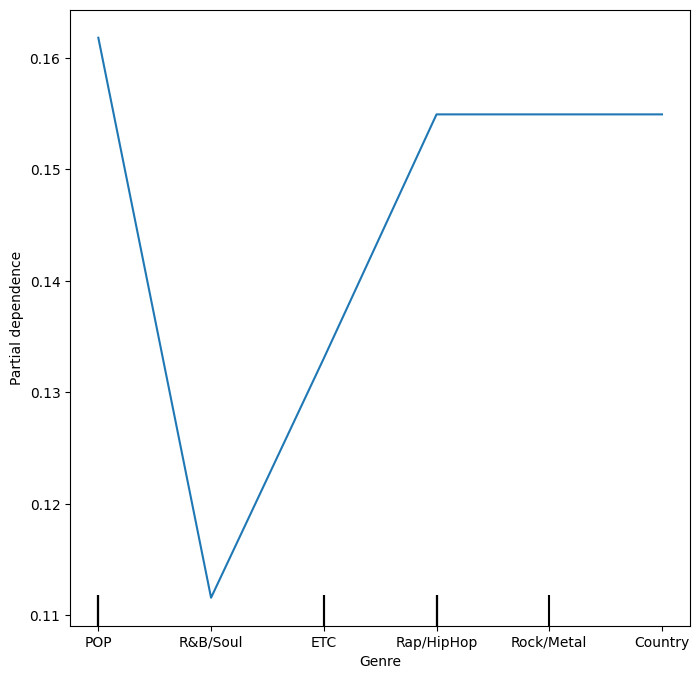

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc('Genre')
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train.values, ## 의존도 계산시 필요한 데이터
                                        features = [idx],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel('Genre')
plt.xticks(ticks = np.arange(0, 6), labels = ['POP', 'R&B/Soul', 'ETC', 'Rap/HipHop', 'Rock/Metal', 'Country'])
plt.show()

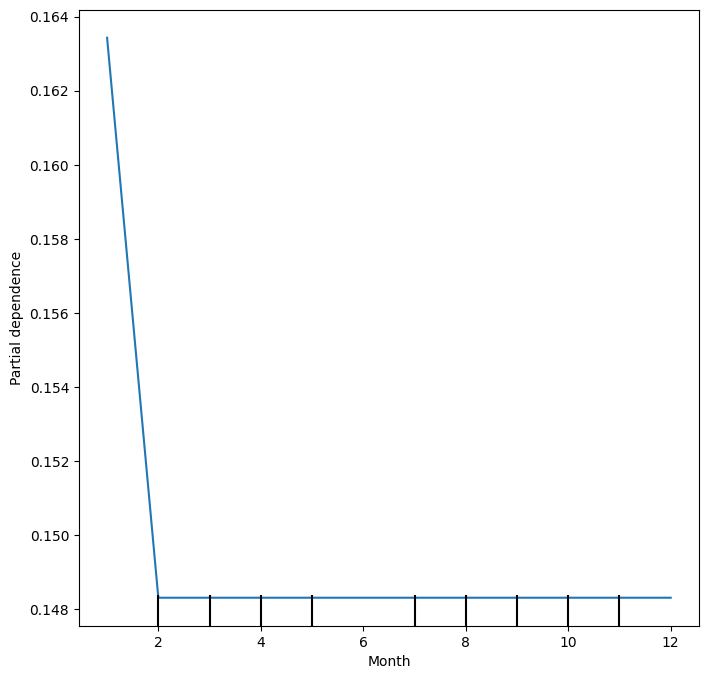

In [ ]:
import matplotlib.pyplot as plt

feature = 'Month'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc(feature)
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train.values, ## 의존도 계산시 필요한 데이터
                                        features = [idx],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel(feature)
# plt.xticks(ticks = np.arange(0, 6), labels = ['POP', 'R&B/Soul', 'ETC', 'Rap/HipHop', 'Rock/Metal', 'Country'])
plt.show()

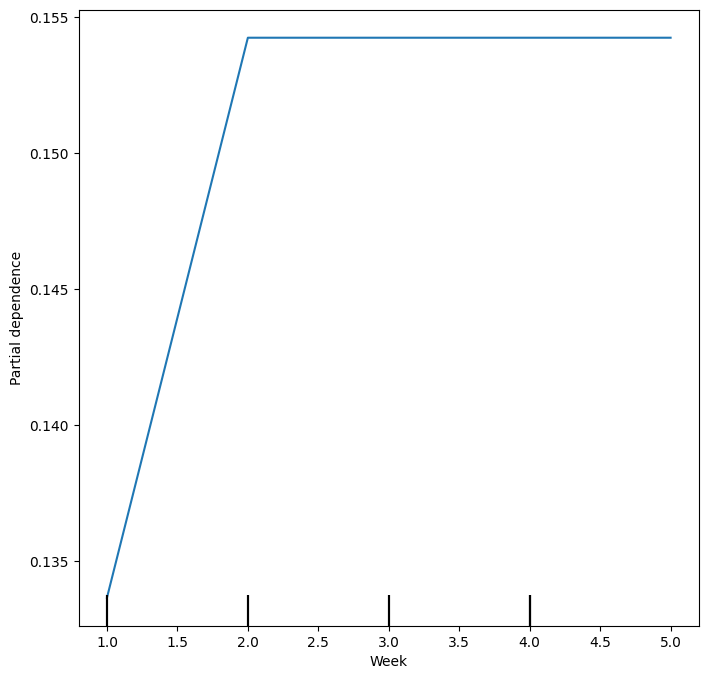

In [ ]:
import matplotlib.pyplot as plt

feature = 'Week'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc(feature)
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train.values, ## 의존도 계산시 필요한 데이터
                                        features = [idx],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel(feature)
# plt.xticks(ticks = np.arange(0, 6), labels = ['POP', 'R&B/Soul', 'ETC', 'Rap/HipHop', 'Rock/Metal', 'Country'])
plt.show()

TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

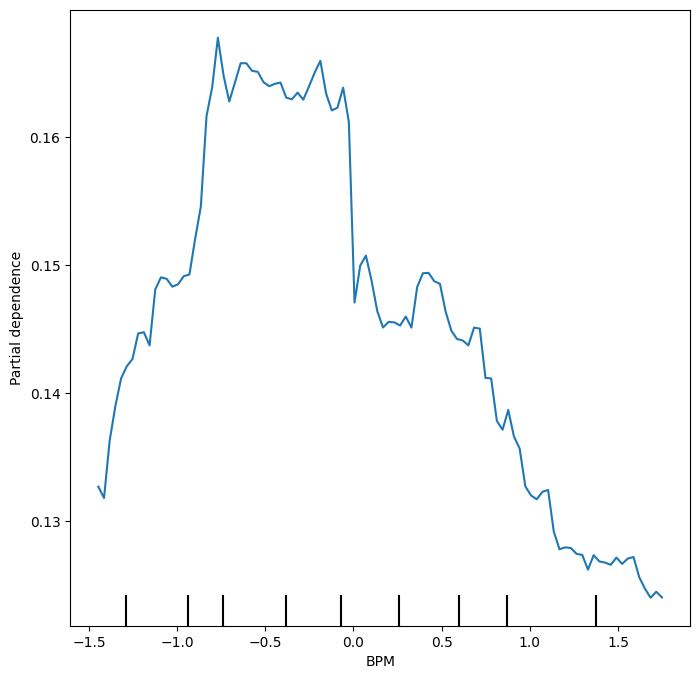

In [ ]:
import matplotlib.pyplot as plt

feature = 'BPM'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc(feature)
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train_scaled, ## 의존도 계산시 필요한 데이터
                                        features = [3],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel(feature)
plt.xticks(labels = ['77.84', '92.64', '107.45', '122.25', '137.06', '151.86', '166.67'])
plt.show()

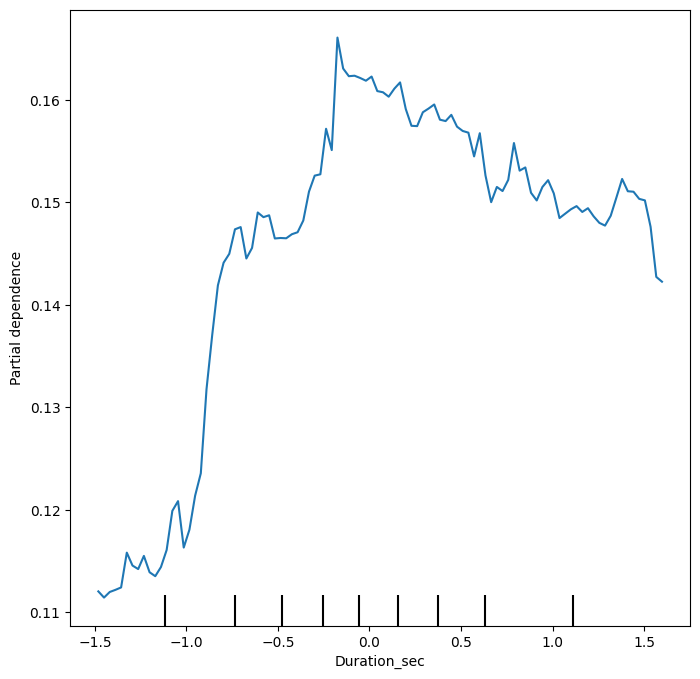

In [ ]:
import matplotlib.pyplot as plt

feature = 'Duration_sec'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc(feature)
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train_scaled, ## 의존도 계산시 필요한 데이터
                                        features = [4],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel(feature)
plt.show()

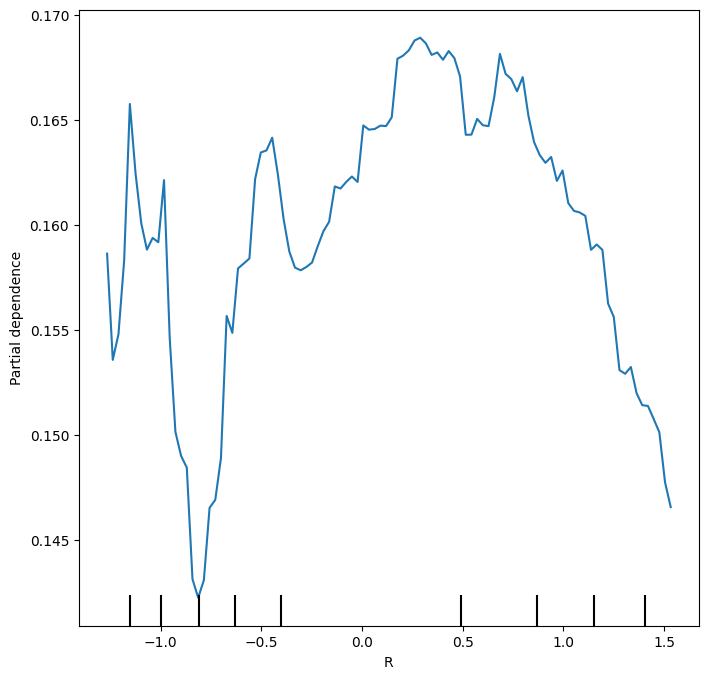

In [ ]:
import matplotlib.pyplot as plt

feature = 'R'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc(feature)
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train_scaled, ## 의존도 계산시 필요한 데이터
                                        features = [5],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel(feature)
plt.show()

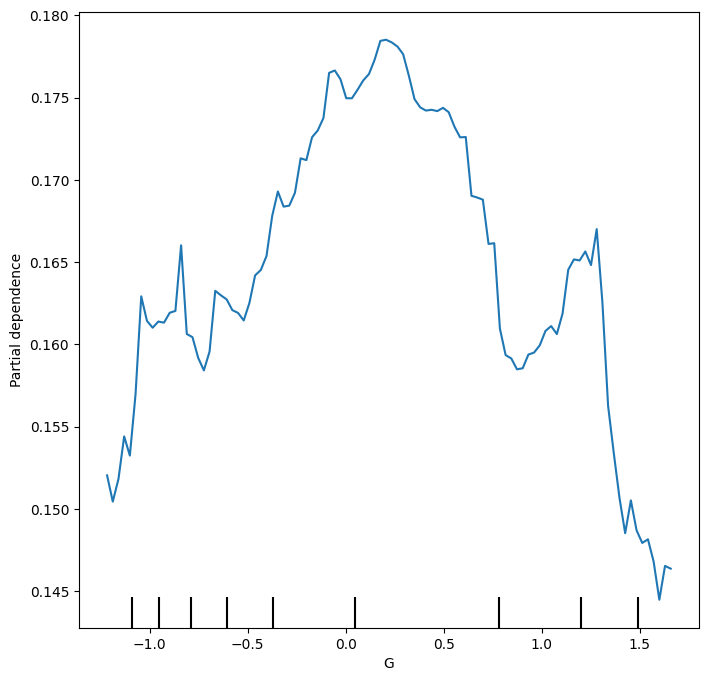

In [ ]:
import matplotlib.pyplot as plt

feature = 'G'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc(feature)
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train_scaled, ## 의존도 계산시 필요한 데이터
                                        features = [6],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel(feature)
plt.show()

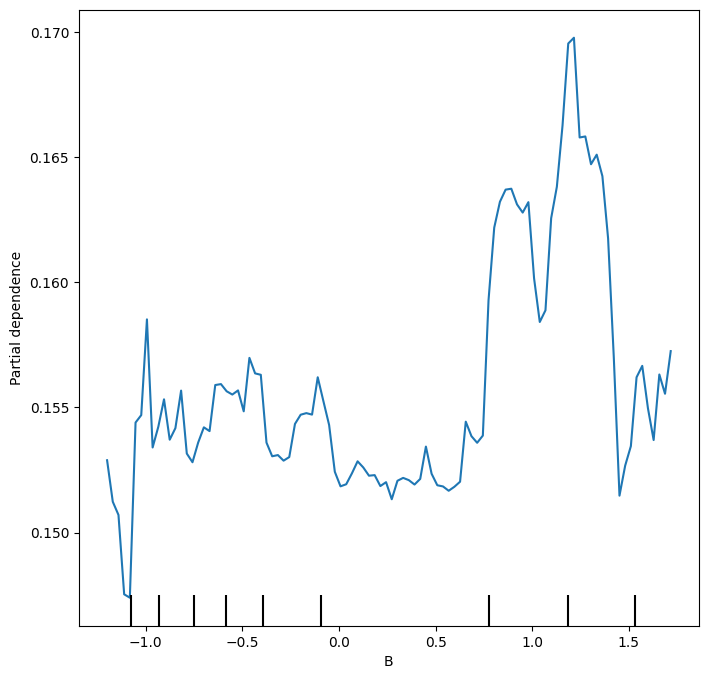

In [ ]:
import matplotlib.pyplot as plt

feature = 'B'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc(feature)
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train_scaled, ## 의존도 계산시 필요한 데이터
                                        features = [7],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel(feature)
plt.show()

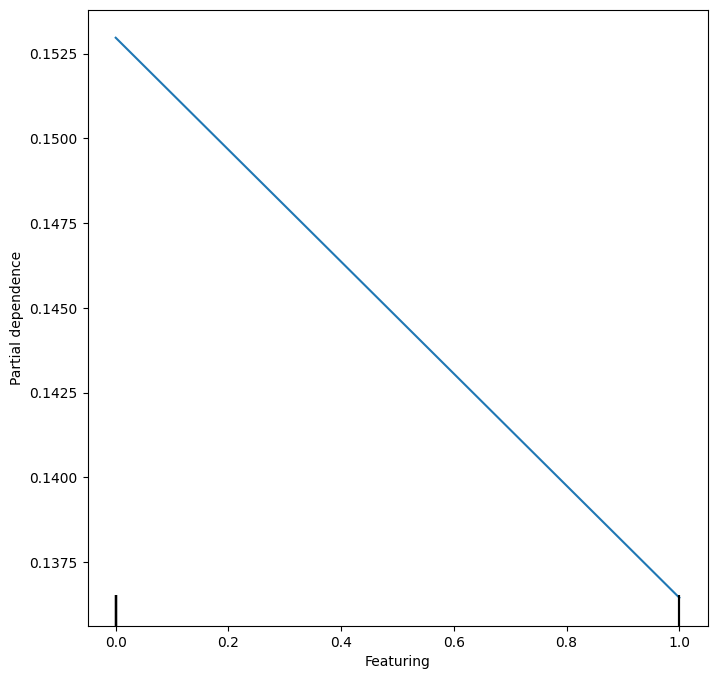

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc('Featuring')
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train.values, ## 의존도 계산시 필요한 데이터
                                        features = [idx],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel('Featuring')
# plt.xticks(ticks = np.arange(0, 6), labels = ['POP', 'R&B/Soul', 'ETC', 'Rap/HipHop', 'Rock/Metal', 'Country'])
plt.show()

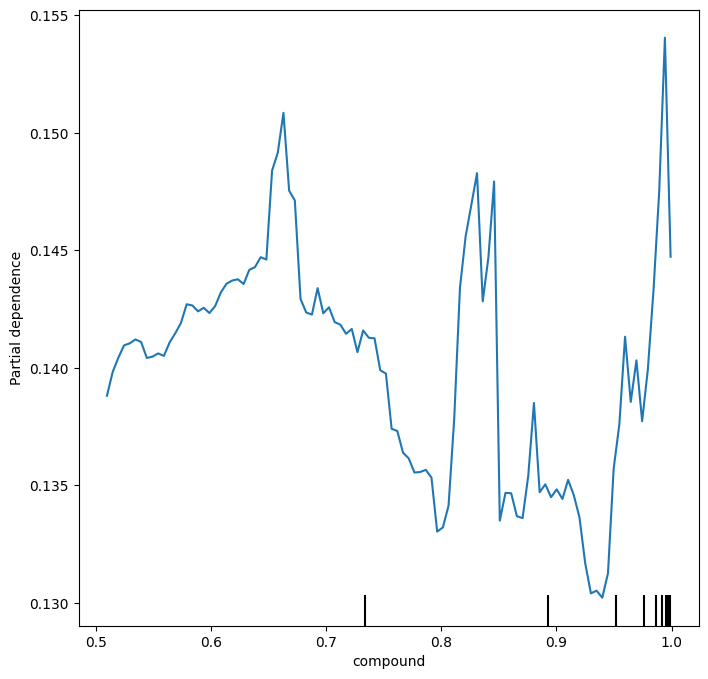

In [ ]:
import matplotlib.pyplot as plt

feature = 'B'
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = X_train.columns.get_loc('compound')
PartialDependenceDisplay.from_estimator(model, ## 학습 모델
                                        X_train_scaled, ## 의존도 계산시 필요한 데이터
                                        features = [idx],
                                        # feature_names=X.columns.tolist(), ## 변수 이름
                                        kind='average', ## average = pdp, ice = ice
                                        ax=ax)
plt.xlabel('compound')
plt.show()

In [ ]:
feature = 'compound'

In [ ]:
print(-1.0 * X_train['B'].std() + X_train['B'].mean())
print(-0.5 * X_train['B'].std() + X_train['B'].mean())
print(0.0 * X_train['B'].std() + X_train['B'].mean())
print(0.5 * X_train['B'].std() + X_train['B'].mean())
print(1.0 * X_train['B'].std() + X_train['B'].mean())
print(1.5 * X_train['B'].std() + X_train['B'].mean())

26.229370097507285
61.89382372437744
97.5582773512476
133.22273097811774
168.8871846049879
204.55163823185808


### Tree 분기 확인

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(model.estimators_[0], out_file = 'test1.dot')

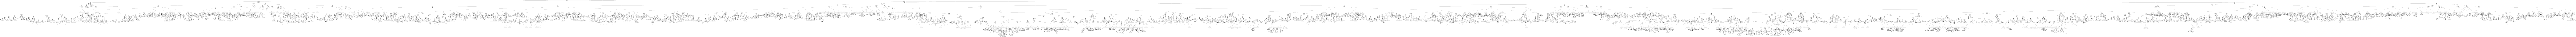

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'test1.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'decision-tree.png')

In [ ]:
export_graphviz(model.estimators_[0], out_file = 'tree.dot', feature_names = ['Year', 'Month', 'Week', 'Genre_POP', 'Genre_R&B/Soul', 'Genre_etc', 'Genre_hiphop', 'Genre/rock', 'Genre_country', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'Featuring', 'compound'], class_names = ['0', '1'])

In [ ]:
len(model.estimators_)

In [ ]:
from sklearn import tree

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tree_in_forest = model.estimators_[0]
print(export_text(tree_in_forest, feature_names = ['Year', 'Month', 'Week', 'Genre_POP', 'Genre_R&B/Soul', 'Genre_etc', 'Genre_hiphop', 'Genre/rock', 'Genre_country', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'Featuring', 'compound']))
# fig = plt.figure(figsize = (15, 8))
# tree.plot_tree(tree_in_forest, feature_names = ['Year', 'Month', 'Week', 'Genre_POP', 'Genre_R&B/Soul', 'Genre_etc', 'Genre_hiphop', 'Genre/rock', 'Genre_country', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'Featuring', 'compound'], class_names = ['0', '1'], filled = True)
# plt.show()

|--- Genre_etc <= -1.13
|   |--- Genre_R&B/Soul <= -1.43
|   |   |--- Genre_etc <= -1.36
|   |   |   |--- B <= 0.50
|   |   |   |   |--- Month <= -0.01
|   |   |   |   |   |--- compound <= 0.78
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- compound >  0.78
|   |   |   |   |   |   |--- Genre_country <= 0.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Genre_country >  0.50
|   |   |   |   |   |   |   |--- Week <= -0.16
|   |   |   |   |   |   |   |   |--- Week <= -0.95
|   |   |   |   |   |   |   |   |   |--- Month <= -1.46
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Month >  -1.46
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Week >  -0.95
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Week >  -0.16
|   |   |   |   |   |   |   |   |--- Month <= -1.17
|   |   |   |   |   |   |   |   |   |--- class: 1.0
| 

In [ ]:
tree_in_forest = model.estimators_[0]
# print(export_text(tree_in_forest, feature_names = list(X.columns)))
fig = plt.figure(figsize = (15, 8))
tree.plot_tree(tree_in_forest, feature_names = ['Year', 'Month', 'Week', 'Genre_POP', 'Genre_R&B/Soul', 'Genre_etc', 'Genre_hiphop', 'Genre/rock', 'Genre_country', 'BPM', 'Duration_sec', 'R', 'G', 'B', 'Featuring', 'compound'], class_names = ['0', '1'], filled = True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:670: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:670: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:670: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:670: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:670: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_exp

KeyboardInterrupt: 

# 하이퍼파라미터 튜닝

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective(trial):
    # 튜닝할 하이퍼파라미터 설정
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 10, 50)
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", [None, "sqrt", "log2"])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # 모델 생성
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        class_weight=class_weight,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )

    # Stratified K-Fold 설정
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 교차 검증 성능 계산
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="f1").mean()
    return score

# Optuna study 생성 및 최적화 수행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)
print("Best F1 Score:", study.best_value)


[I 2024-10-26 15:05:34,907] A new study created in memory with name: no-name-3cc26220-7bdc-44ad-a1bb-a6f491929288
[I 2024-10-26 15:07:32,477] Trial 0 finished with value: 0.6979003352928422 and parameters: {'n_estimators': 279, 'max_depth': 34, 'class_weight': 'balanced', 'min_samples_split': 19, 'min_samples_leaf': 20, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.6979003352928422.
[I 2024-10-26 15:08:25,861] Trial 1 finished with value: 0.5005237910777867 and parameters: {'n_estimators': 58, 'max_depth': 11, 'class_weight': 'balanced_subsample', 'min_samples_split': 8, 'min_samples_leaf': 12, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.6979003352928422.
[I 2024-10-26 15:10:49,425] Trial 2 finished with value: 0.5570117003839552 and parameters: {'n_estimators': 147, 'max_depth': 13, 'class_weight': 'balanced_subsample', 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 0 wi

KeyboardInterrupt: 